Imports numpy, matplotlib, and a random number method for use later in the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [2]:
%matplotlib inline

In [3]:
def rNeg1Pos1():
    """Returns a random number between -1 and +1."""
    return (np.random.rand() * 2) - 1

This Perceptron class is the centerpiece of this notebook.
Given example points, it can learn to linearly classify future points.

In [4]:
class Perceptron:
    """
    A Perceptron takes a given number of inputs, multiplies these inputs with corresponding weights, and then
    applies a step function on the sum to make a prediction on the given inputs' classification. It can then
    train using error from incorrectly classified inputs in order to improve its predictions on future examples.
    """
    def __init__(self, inputNum = 2, learningRate = 0.1):
        """
        Parameters
        ----------
        inputNum : int
            The number of inputs the Perceptron can take. Defaults to 2.
        learningRate : float
            The learning rate influences how quickly the Perceptron will train using each training example.
        """
        self.lr = learningRate
        # Creates a bias of 1 and the correct number of randomly generated weights.
        self.weights = np.append([1.0], np.random.rand(inputNum))
    
    def inputFix(self, inputArray):
        """
        Prepends a 1 to the beginning of the input, which allows the Perceptron's bias to function.
        
        Parameters
        ----------
        inputArray : numpy array
            A modified version of this array (with a 1 prepended before it) will be returned.
        """
        return np.append([1.0], inputArray)
    
    def getInputNum(self):
        """Returns the intended number of inputs for this Perceptron."""
        return len(self.weights) - 1
    
    def getWeights(self):
        """Returns the weights array of this Perceptron."""
        return self.weights
    
    def activation(self, n):
        """
        Acts as a step function, which is this Perceptron's activation function.
        
        Parameters
        ----------
        n : int or float
            The number whose sign will be returned.
        """
        return np.sign(n)
    
    def guess(self, p):
        """
        Given a Point, returns the Perceptron's guess of the Point's classification.
        
        Parameters
        ----------
        p : Point
            The Point this method will attempt to classify.
        """
        total = np.dot(self.weights, self.inputFix(p.getCoords()))
        return self.activation(total)
    
    def train(self, p):
        """
        Trains the Perceptron using a given Point.
        
        Parameters
        ----------
        p : Point
            The Point that the Perceptron will train on.
        """
        # Adds a 1 to the beginning of the coordinates, allowing the Perceptron's bias to work as intended.
        fixedInputs = self.inputFix(p.getCoords())
        
        # The error is the difference between the Point's ground truth classification and the Perceptron's guess.
        error = p.getLabel() - self.guess(p)
        
        # For each weight, update the weight based on the Perceptron's error on the current training example.
        for i in range(len(self.weights)):
            self.weights[i] = self.weights[i] + (error * fixedInputs[i] * self.lr)
    
    def lowerLearningRate(self):
        """Decreases the influence of future training by decreasing the Perceptron's learning rate by 10%."""
        self.lr = self.lr * 0.90

In [5]:
p = Perceptron(2, 0.1)
print("This Perceptron can process %d inputs." % (p.getInputNum()))
print(p.getWeights())

This Perceptron can process 2 inputs.
[1.         0.3773624  0.31124884]


In [6]:
width = 500 # Sets the width of the graph.
height = 500 # Sets the height of the graph.
m = rNeg1Pos1() * 10 # Sets the slope of our ground truth line to a random number between -10 and 10.
b = rNeg1Pos1() * 10 # Sets the y-intercept of our ground truth line to a random number between -10 and 10.
print("The slope of the line will be %f and the y-intercept will be %f." % (m, b))

The slope of the line will be -1.291044 and the y-intercept will be 1.217513.


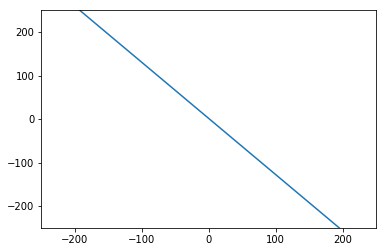

In [7]:
x = np.arange(-width//2, width//2, 0.1) # Sets the range of x for the graph.
y = m*x + b

def graphLine():
    """Graphs the ground truth line."""
    plt.axis([-width//2, width//2, -height//2, height//2])
    plt.plot(x, y)
    
graphLine()

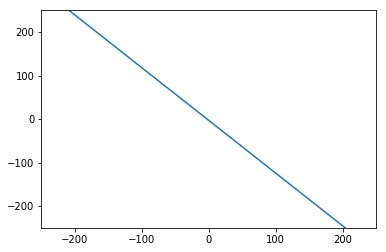

In [8]:
def graphGuessLine():
    """Graphs the Perceptron's current guess of the classification line."""
    weights = p.getWeights()
    slope = -(weights[1]/weights[2])
    yIntercept = -(weights[0]/weights[2])
    
    x1 = np.arange(-width//2, width//2, 0.1) # Sets the range of x for the graph.
    y1 = slope*x1 + yIntercept
    
    plt.axis([-width//2, width//2, -height//2, height//2])
    plt.plot(x1, y1)
    
graphGuessLine()

In [9]:
class Point():
    """
    A Point has both an x- and y-coordinates and can plot itself using the matplotlib library. It also calculates
    and then stores its correct classification based on whether it's above or below the ground truth line.
    """
    def __init__(self):
        # Sets the Point's x- and y-coordinates to somewhere in the graph's coordinate space.
        self.x = rNeg1Pos1() * width / 2
        self.y = rNeg1Pos1() * height / 2
        # Sets the Point's "correct label" depending on whether the Point is above or below the ground truth line.
        self.label = np.sign(self.y - (m*self.x + b))
        # This stores whether the Point is part of the training or testing data set. Defaults to training set.
        self.train = True
    
    def plotMe(self):
        """
        Plots this Point on the graph.
        The plotted point will be colored blue if it's above or red if it's below the ground truth line.
        """
        if self.label == 1:
            plt.plot([self.x], [self.y], "bo")  
        else:
            plt.plot([self.x], [self.y], "ro")
    
    def plotGuess(self, g):
        """
        Plots this Point on the graph, colored green if it was correctly classified and red if it was not.
        
        Parameters
        ----------
        g : int
            The Perceptron's guess of this Point's classification.
        """
        if g == 1:
            plt.plot([self.x], [self.y], "go")  
        else:
            plt.plot([self.x], [self.y], "ro")

    def plotTest(self, g):
        """
        Plots this Point on the graph if the Point is part of the test data. 
        The plotted Point will be colored green if it was correctly classified and red if it was not.
        
        Parameters
        ----------
        g : int
            The Perceptron's guess of this Point's classification.
        """
        if self.train == False:
            if g == self.label:
                plt.plot([self.x], [self.y], "g.")  
            else:
                plt.plot([self.x], [self.y], "ro")
    
    def getCoords(self):
        """Returns this Point's coordinates as a numpy array."""
        return np.array([self.x, self.y])
    
    def getLabel(self):
        """Returns the correct label for this Point."""
        return self.label
    
    def setTest(self):
        """Sets this Point as part of the test data set."""
        self.train = False

In [10]:
def setTestData(percentTestData, pointArr):
    """
    Sets a given percentage of the Points in the data set as test data.
    
    Parameters
    ----------
    percentTestData : float
        The percent, given as a decimal out of 1, of the data that should be in the test set.
    pointArr : Point array
        The array containing the data set of Points.
    """
    for point in pointArr:
        r = np.random.rand()
        if percentTestData > r:
            point.setTest()

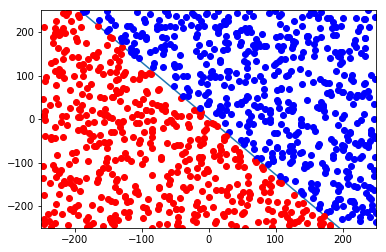

In [11]:
points = []
pointNumber = 1000 # The size of the data set.
for i in range(pointNumber):
    points.append(Point())

setTestData(0.25, points)
    
def graphAll():
    """Graphs the ground truth line as well as all Points in the data set."""
    graphLine()
    for point in points:
        point.plotMe()

graphAll()

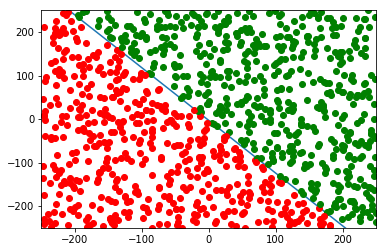

In [12]:
def graphGuess():
    """Graphs the Perceptron's current guess for each Point's classification."""
    graphGuessLine()
    for point in points:
        guess = p.guess(point)
        point.plotGuess(guess)

graphGuess()

In [13]:
def graphTest(showCorrect = True):
    """
    Graphs the ground truth line, the Perceptron's guess line, and the Points in the test data set.
    
    Parameters
    ----------
    showCorrect : bool
        Determines whether or not correctly classified points should be plotted. Defaults to True.
    """
    graphLine()
    graphGuessLine()
    for point in points:
        if not point.train:
            guess = p.guess(point)
            if (not showCorrect) and guess == point.getLabel():
                continue
            point.plotTest(guess)

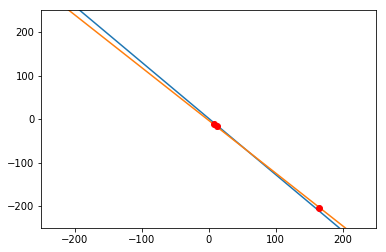

In [14]:
# Plot all incorrectly classified test examples.
graphTest(False)

In [15]:
def trainRandom(exampleNum):
    """
    Trains the Perceptron on a given number of random training examples.
    
    Parameters
    ----------
    exampleNum : int
        The number of example Points to train on.
    """
    availableExamples = []
    for i in range(pointNumber):
        availableExamples.append(i)
    
    for i in range(1, exampleNum + 1):
        print("Training... Step %d of %d" % (i, exampleNum))
        while (True):
            # If we've trained on every Point, exit the loop.
            if (len(availableExamples) == 0):
                print("All usable examples have been trained on. Exiting training.")
                return
            
            # Update our example to a random unused Point index.
            currentNum = randint(0, len(availableExamples) - 1)
            
            # Remove the used Point index from the array of available Point indices.
            currentPoint = points[availableExamples[currentNum]]
            del availableExamples[currentNum]
            
            # Doesn't train on the Point if it's either not part of the training data or already correct.
            if (currentPoint.train == False) or (currentPoint.getLabel() == p.guess(currentPoint)):
                continue
            else:
                print("Training on Point %d." % (currentNum))
                p.train(currentPoint)
                p.lowerLearningRate()
                break
    print("Successfully trained on %d points." % (exampleNum))

In [16]:
def trainAll(feedback = True):
    """
    Trains the Perceptron using all training examples. Returns the accuracy percent on used training examples.
    
    Parameters
    ----------
    feedback : bool
        Determines whether or not to print intermediate updates during the training. Defaults to True.
    """
    totalMistakes = 0
    totalTrainedOn = 0
    for i in range(pointNumber):
        if feedback:
            print("Training on Point %d of %d" % (i + 1, pointNumber))
        example = points[i]
        # Doesn't train on the Point if it's either not part of the training data or already correct.
        if (example.train == False):
            continue
        totalTrainedOn += 1
        if (example.getLabel() == p.guess(example)):
            continue
        else:
            totalMistakes += 1
            p.train(example)
    accuracyPercent = 100. * (1 - (float(totalMistakes) / totalTrainedOn))
    if feedback:
        print("Training on all points complete.")
        print("Total mistakes: %d out of %d training examples." % (totalMistakes, totalTrainedOn))
        print("This was a %f percent accuracy." % (accuracyPercent))
    return accuracyPercent

In [17]:
def continueTraining(feedback = True):
    """
    Lowers the Perceptron's learning rate and then trains using all training Points.
    Returns the accuracy percent on used training examples.
    
    Parameters
    ----------
    feedback : bool
        Determines whether or not to print intermediate updates during the training. Defaults to True.
    """
    p.lowerLearningRate()
    accuracyPercent = trainAll(feedback)
    return accuracyPercent

In [18]:
def trainComplete(maxTrainingSteps, feedback = False):
    """
    Trains using all examples repeatedly until either a maximum number of training steps is reached 
    or all training data was correctly classified.
    
    Parameters
    ----------
    maxTrainingSteps : int
        The maximum number of training cycles the Perceptron is allowed to undergo.
    feedback : bool
        Determines whether or not to print intermediate updates during the training. Defaults to False.
    """
    print("Perceptron now on training step 1.")
    accuracy = trainAll(False)
    print("The last step had a %f percent accuracy on the training data set." % (accuracy))
    counter = 1
    while (True):
        if accuracy == 100:
            print("Perceptron trained after %d training steps." % (counter))
            return
        if counter >= maxTrainingSteps:
            print("Maximum number of training steps, %d, was reached." % (maxTrainingSteps))
            return
        counter += 1
        print("Perceptron now on training step %d." % (counter))
        print("The last step had a %f percent accuracy on the training data set." % (accuracy))
        accuracy = continueTraining(False)

In [19]:
def test():
    """Prints information about whether or not the Perceptron correctly classified the test examples."""
    testExamples = 0
    correct = 0
    for point in points:
        # If the Point was part of the training data set, don't include it in this calculation.
        if point.train == True:
            continue
        else:
            testExamples += 1
            if (p.guess(point) == point.getLabel()):
                correct += 1
            else:
                continue
    print("The Perceptron correctly classified %d test examples out of %d." % (correct, testExamples))
    print("This was a %f percent accuracy." % (100 * correct / testExamples))

In [20]:
test()

The Perceptron correctly classified 240 test examples out of 243.
This was a 98.765432 percent accuracy.


In [21]:
trainRandom(10)

Training... Step 1 of 10
Training on Point 461.
Training... Step 2 of 10
Training on Point 273.
Training... Step 3 of 10
Training on Point 474.
Training... Step 4 of 10
Training on Point 533.
Training... Step 5 of 10
Training on Point 654.
Training... Step 6 of 10
Training on Point 250.
Training... Step 7 of 10
Training on Point 807.
Training... Step 8 of 10
Training on Point 732.
Training... Step 9 of 10
Training on Point 488.
Training... Step 10 of 10
Training on Point 10.
Successfully trained on 10 points.


In [22]:
test()

The Perceptron correctly classified 236 test examples out of 243.
This was a 97.119342 percent accuracy.


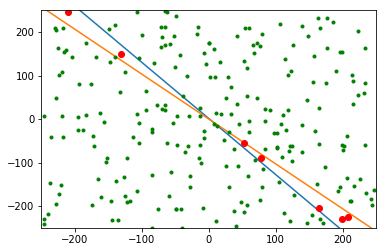

In [23]:
# Plot all test examples, colored green or red depending on if the Perceptron correctly classified the Point.
graphTest()

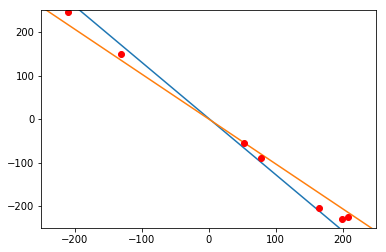

In [24]:
# Plot all incorrectly labeled test examples.
graphTest(False)

In [25]:
trainComplete(5, True)

Perceptron now on training step 1.
The last step had a 95.640687 percent accuracy on the training data set.
Perceptron now on training step 2.
The last step had a 95.640687 percent accuracy on the training data set.
Perceptron now on training step 3.
The last step had a 98.018494 percent accuracy on the training data set.
Perceptron now on training step 4.
The last step had a 99.603699 percent accuracy on the training data set.
Perceptron now on training step 5.
The last step had a 99.603699 percent accuracy on the training data set.
Maximum number of training steps, 5, was reached.


In [26]:
test()

The Perceptron correctly classified 242 test examples out of 243.
This was a 99.588477 percent accuracy.


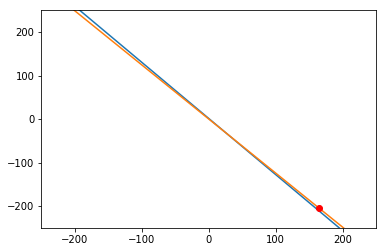

In [27]:
# Plot all incorrectly labeled test examples.
graphTest(False)